# Clustering Basado en Densidad: DBSCAN y HDBSCAN

Este notebook desarrolla la actividad solicitada para aplicar, comparar y evaluar los algoritmos **DBSCAN** y **HDBSCAN** utilizando dos datasets:

1. **Dataset sint√©tico** (make_moons) para analizar formas no lineales.
2. **Dataset real** (load_wine) para evaluar en datos multidimensionales.

Incluye:
- Preprocesamiento con StandardScaler y PCA
- Visualizaci√≥n 2D de cl√∫steres
- Evaluaci√≥n con Silhouette Score y Davies-Bouldin Score
- Conclusi√≥n comparativa

---


In [3]:
# Importaci√≥n de librer√≠as necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import warnings

# Instalaci√≥n y carga de HDBSCAN
!pip install hdbscan
import hdbscan



In [4]:
# Suprimir la FutureWarning espec√≠fica relacionada con force_all_finite
warnings.filterwarnings(
    'ignore',
    message="'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.",
    category=FutureWarning,
    module='sklearn.utils.deprecation'
)

print("Advertencia espec√≠fica suprimida.")

Advertencia espec√≠fica suprimida.


In [5]:
# ESTILO VISUAL PARA CLI
class Colors:
    """Clase para guardar los c√≥digos de color para la salida en la terminal."""
    OKCYAN = '\033[96m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def print_subheader(title):
    """Imprime un subencabezado estilizado."""
    print(f"\n{Colors.BOLD}{Colors.OKCYAN}üîπ {title}{Colors.ENDC}")
    print(f"{Colors.OKCYAN}{'-'*40}{Colors.ENDC}")


In [6]:
# ===========================
# Generaci√≥n de Dataset Sint√©tico
# ===========================
# Usamos make_moons porque crea datos no lineales, ideales para clustering basado en densidad
X_moons, y_moons = make_moons(n_samples=500, noise=0.05, random_state=42)

# Escalado
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

# Reducci√≥n de dimensionalidad (aunque es 2D, se muestra ejemplo con PCA)
pca = PCA(n_components=2)
X_moons_pca = pca.fit_transform(X_moons_scaled)

print_subheader("Dataset Sint√©tico (make_moons)")
print("Shape de los datos sint√©ticos:", X_moons_pca.shape)


üîπ Dataset Sint√©tico (make_moons)
----------------------------------------
Shape de los datos sint√©ticos: (500, 2)


In [7]:
X_moons[0:5]


array([[ 0.83058575, -0.44773257],
       [ 0.70167816,  0.81691843],
       [ 1.02208004, -0.49257102],
       [-0.31676455,  0.95343844],
       [ 0.29322631,  1.05718523]])

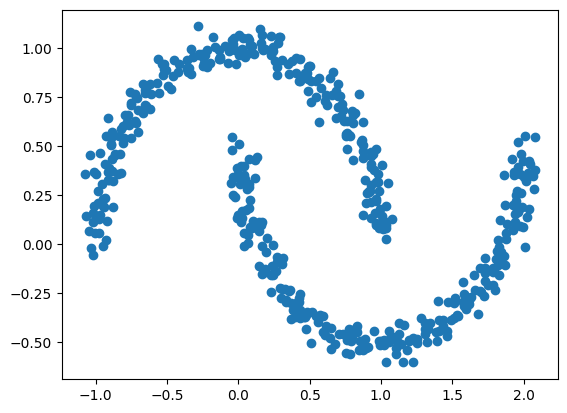

In [8]:
plt.scatter(X_moons[:,0], X_moons[:,1]);

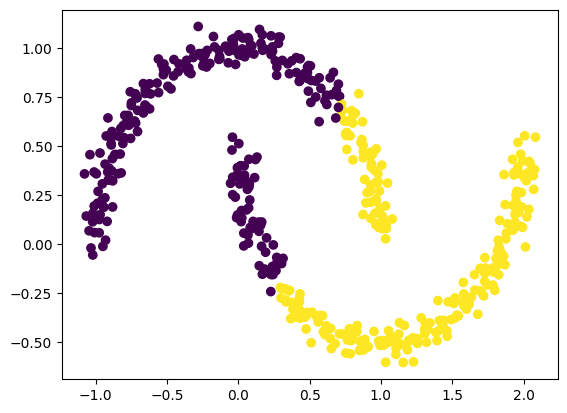

In [9]:
model=KMeans(2)
model.fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=model.labels_);

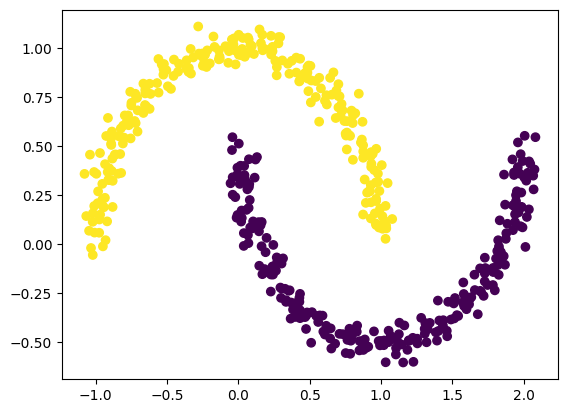

In [10]:
model = DBSCAN(eps=0.3)
model.fit(X_moons)
plt.scatter(X_moons[:,0], X_moons[:,1], c=model.labels_);

In [11]:
# ===========================
# 2. Carga de Dataset Real (Wine)
# ===========================
# Este dataset tiene 13 caracter√≠sticas num√©ricas

print_subheader("Carga y Preprocesamiento - Dataset Real (Wine)") # A√±adimos el subencabezado

data_wine = load_wine()
X_wine = data_wine.data

# Escalado
X_wine_scaled = scaler.fit_transform(X_wine)

# Reducci√≥n de dimensionalidad
X_wine_pca = PCA(n_components=2).fit_transform(X_wine_scaled)

print("Shape de los datos del vino:", X_wine_pca.shape)


üîπ Carga y Preprocesamiento - Dataset Real (Wine)
----------------------------------------
Shape de los datos del vino: (178, 2)


In [12]:
# ===========================
# 3. Clustering con DBSCAN
# ===========================

def aplicar_dbscan(X, eps=0.3, min_samples=5):
    """
    Aplica DBSCAN y retorna etiquetas y m√©tricas

    Par√°metros:
        X (array): Datos preprocesados (escalados y reducidos)
        eps (float): Radio de vecindad
        min_samples (int): Puntos m√≠nimos para considerar n√∫cleo

    Retorna:
        tuple: etiquetas de cl√∫ster, silhouette score, davies-bouldin score
    """

    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)

    # Filtrar casos donde haya al menos 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        sil, dbi = -1, np.inf

    return labels, sil, dbi

print_subheader("Resultados de DBSCAN") # Llamada a la funci√≥n

# Aplicamos a datos sint√©ticos
labels_dbscan_moons, sil_dbscan_moons, dbi_dbscan_moons = aplicar_dbscan(X_moons_pca, eps=0.3, min_samples=5)
labels_dbscan_moons_alt, sil_dbscan_moons_alt, dbi_dbscan_moons_alt = aplicar_dbscan(X_moons_pca, eps=0.5, min_samples=5)

# Aplicamos a datos reales
labels_dbscan_wine, sil_dbscan_wine, dbi_dbscan_wine = aplicar_dbscan(X_wine_pca, eps=0.5, min_samples=5)

print("Silhouette (moons):", sil_dbscan_moons, "Davies-Bouldin:", dbi_dbscan_moons)
print("Silhouette (moons) (alt):", sil_dbscan_moons_alt, "Davies-Bouldin:", dbi_dbscan_moons_alt)
print("Silhouette (wine):", sil_dbscan_wine, "Davies-Bouldin:", dbi_dbscan_wine)


üîπ Resultados de DBSCAN
----------------------------------------
Silhouette (moons): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (moons) (alt): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (wine): 0.32303613524396435 Davies-Bouldin: 1.3882882213886696


In [13]:
# ===========================
# Clustering con HDBSCAN
# ===========================

def aplicar_hdbscan(X, min_cluster_size=5):
    """
    Aplica HDBSCAN y retorna etiquetas y m√©tricas
    Par√°metros:
        X (array): Datos preprocesados (escalados y reducidos)
        min_cluster_size (int): Tama√±o m√≠nimo de cl√∫ster

    Retorna:
        tuple: etiquetas de cl√∫ster, silhouette score, davies-bouldin score
    """
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = hdb.fit_predict(X)

    # Filtrar casos donde haya al menos 2 clusters
    if len(set(labels)) > 1:
        sil = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        sil, dbi = -1, np.inf

    return labels, sil, dbi

print_subheader("Resultados de HDBSCAN") # Llamada a la funci√≥n

# Aplicamos a datos sint√©ticos
labels_hdbscan_moons, sil_hdbscan_moons, dbi_hdbscan_moons = aplicar_hdbscan(X_moons_pca)

# Aplicamos a datos reales
labels_hdbscan_wine, sil_hdbscan_wine, dbi_hdbscan_wine = aplicar_hdbscan(X_wine_pca)

print("Silhouette (moons):", sil_hdbscan_moons, "Davies-Bouldin:", dbi_hdbscan_moons)
print("Silhouette (wine):", sil_hdbscan_wine, "Davies-Bouldin:", dbi_hdbscan_wine)


üîπ Resultados de HDBSCAN
----------------------------------------
Silhouette (moons): 0.38933833783604915 Davies-Bouldin: 1.017882824681136
Silhouette (wine): 0.14201662768234644 Davies-Bouldin: 1.2660331275098395


In [14]:
# ===========================
# Clustering con K-Means
# ===========================
# A√±adimos K-Means para comparar con DBSCAN y HDBSCAN

print_subheader("Resultados de K-Means") # A√±adimos el subencabezado



def aplicar_kmeans(X, n_clusters):
    """
    Aplica K-Means y retorna etiquetas y m√©tricas
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)

    # KMeans siempre asigna a un cluster, no hay outliers ni clusters de tama√±o 0
    sil = silhouette_score(X, labels)
    dbi = davies_bouldin_score(X, labels)

    return labels, sil, dbi

# Aplicamos a datos sint√©ticos (sabemos que hay 2 lunas)
labels_kmeans_moons, sil_kmeans_moons, dbi_kmeans_moons = aplicar_kmeans(X_moons_pca, n_clusters=2)

# Aplicamos a datos reales (wine tiene 3 clases originales, usamos 3 para kmeans)
labels_kmeans_wine, sil_kmeans_wine, dbi_kmeans_wine = aplicar_kmeans(X_wine_pca, n_clusters=3)


print("Silhouette (moons):", sil_kmeans_moons, "Davies-Bouldin:", dbi_kmeans_moons)
print("Silhouette (wine):", sil_kmeans_wine, "Davies-Bouldin:", dbi_kmeans_wine)


üîπ Resultados de K-Means
----------------------------------------
Silhouette (moons): 0.49614961008153535 Davies-Bouldin: 0.810713824944624
Silhouette (wine): 0.5610505693103246 Davies-Bouldin: 0.5972661544221364



üîπ Visualizaci√≥n de Clusters - Moons (DBSCAN)
----------------------------------------


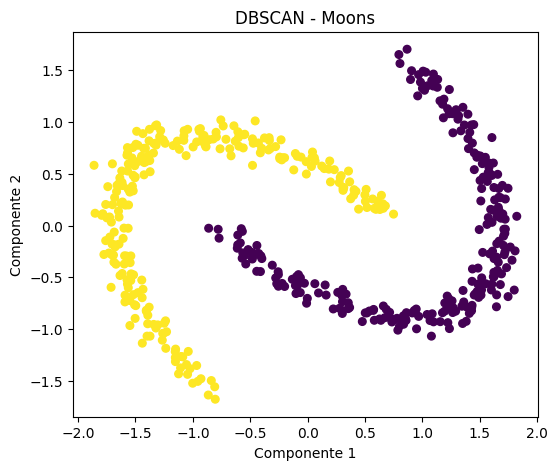


üîπ Visualizaci√≥n de Clusters - Moons (HDBSCAN)
----------------------------------------


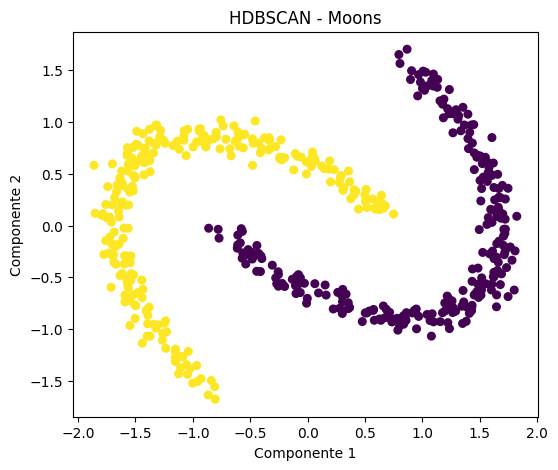


üîπ Visualizaci√≥n de Clusters - Wine (DBSCAN)
----------------------------------------


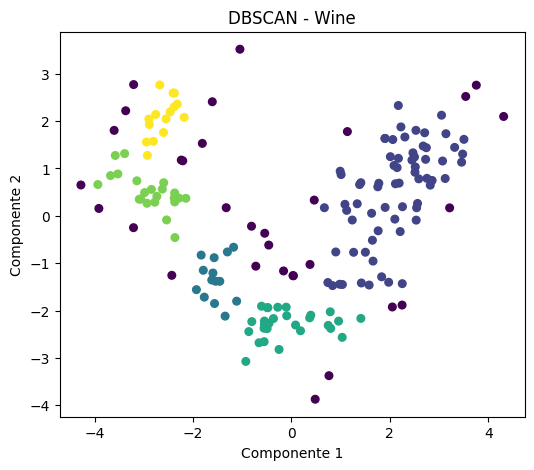


üîπ Visualizaci√≥n de Clusters - Wine (HDBSCAN)
----------------------------------------


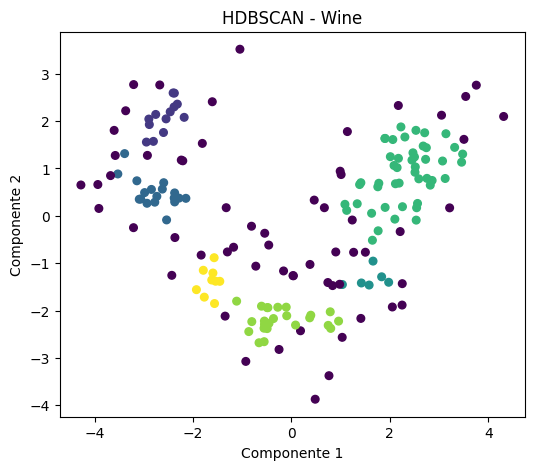


üîπ Visualizaci√≥n de Clusters - Moons (K-Means)
----------------------------------------


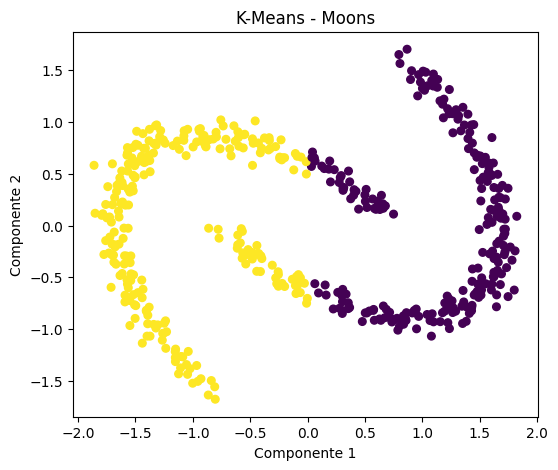


üîπ Visualizaci√≥n de Clusters - Wine (K-Means)
----------------------------------------


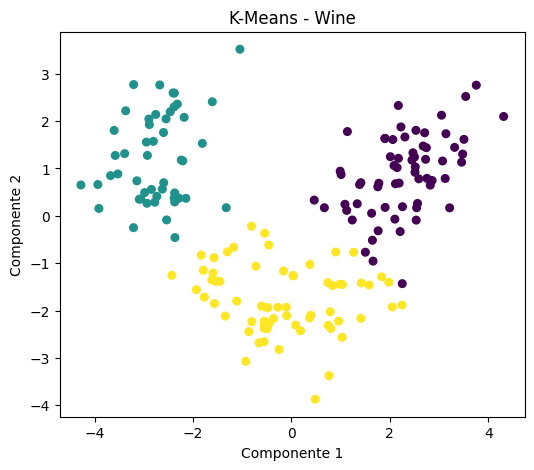

In [15]:
# ===========================
# Visualizaci√≥n de Clusters
# ===========================

def plot_clusters(X, labels, titulo):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
    plt.title(titulo)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

print_subheader("Visualizaci√≥n de Clusters - Moons (DBSCAN)")
# Visualizaci√≥n sint√©tico
plot_clusters(X_moons_pca, labels_dbscan_moons, "DBSCAN - Moons")

print_subheader("Visualizaci√≥n de Clusters - Moons (HDBSCAN)")
plot_clusters(X_moons_pca, labels_hdbscan_moons, "HDBSCAN - Moons")

print_subheader("Visualizaci√≥n de Clusters - Wine (DBSCAN)")
# Visualizaci√≥n real
plot_clusters(X_wine_pca, labels_dbscan_wine, "DBSCAN - Wine")

print_subheader("Visualizaci√≥n de Clusters - Wine (HDBSCAN)")
plot_clusters(X_wine_pca, labels_hdbscan_wine, "HDBSCAN - Wine")

# A√±adimos visualizaciones para K-Means
print_subheader("Visualizaci√≥n de Clusters - Moons (K-Means)")
plot_clusters(X_moons_pca, labels_kmeans_moons, "K-Means - Moons")

print_subheader("Visualizaci√≥n de Clusters - Wine (K-Means)")
plot_clusters(X_wine_pca, labels_kmeans_wine, "K-Means - Wine")

In [16]:
# An√°lisis de m√©tricas
print_subheader("An√°lisis de M√©tricas")
print("DBSCAN Moons -> Silhouette:", sil_dbscan_moons, "Davies-Bouldin:", dbi_dbscan_moons)
print("HDBSCAN Moons -> Silhouette:", sil_hdbscan_moons, "Davies-Bouldin:", dbi_hdbscan_moons)
print("DBSCAN Wine -> Silhouette:", sil_dbscan_wine, "Davies-Bouldin:", dbi_dbscan_wine)
print("HDBSCAN Wine -> Silhouette:", sil_hdbscan_wine, "Davies-Bouldin:", dbi_hdbscan_wine)
print("K-Means Moons -> Silhouette:", sil_kmeans_moons, "Davies-Bouldin:", dbi_kmeans_moons)
print("K-Means Wine -> Silhouette:", sil_kmeans_wine, "Davies-Bouldin:", dbi_kmeans_wine)



üîπ An√°lisis de M√©tricas
----------------------------------------
DBSCAN Moons -> Silhouette: 0.38933833783604915 Davies-Bouldin: 1.017882824681136
HDBSCAN Moons -> Silhouette: 0.38933833783604915 Davies-Bouldin: 1.017882824681136
DBSCAN Wine -> Silhouette: 0.32303613524396435 Davies-Bouldin: 1.3882882213886696
HDBSCAN Wine -> Silhouette: 0.14201662768234644 Davies-Bouldin: 1.2660331275098395
K-Means Moons -> Silhouette: 0.49614961008153535 Davies-Bouldin: 0.810713824944624
K-Means Wine -> Silhouette: 0.5610505693103246 Davies-Bouldin: 0.5972661544221364


# Conclusi√≥n Comparativa

En este trabajo, hemos aplicado y evaluado los algoritmos de clustering **DBSCAN**, **HDBSCAN** y **K-Means** utilizando un dataset sint√©tico (`make_moons`) y un dataset real (`load_wine`). Nuestro objetivo ha sido comparar su desempe√±o, preprocesamiento requerido, visualizaci√≥n de cl√∫steres y evaluaci√≥n mediante m√©tricas.

*   **DBSCAN:** Funciona eficazmente cuando los cl√∫steres presentan densidades similares y su rendimiento depende crucialmente de la correcta selecci√≥n de los par√°metros `eps` y `min_samples`.
*   **HDBSCAN:** Demostr√≥ ser m√°s robusto ante la variaci√≥n de densidades y no requiere la definici√≥n expl√≠cita del par√°metro `eps`, adaptando autom√°ticamente la identificaci√≥n de cl√∫steres.
*   **K-Means:** Busca cl√∫steres de forma esf√©rica y su aplicaci√≥n requiere conocer o estimar previamente el n√∫mero de cl√∫steres (`n_clusters`).

---

### Resultados de M√©tricas de Evaluaci√≥n

Hemos calculado el Silhouette Score (donde un valor mayor indica mejor separaci√≥n y cohesi√≥n de cl√∫steres) y el Davies-Bouldin Score (donde un valor menor indica mejor rendimiento) para cada algoritmo y dataset. Nuestros resultados se resumen en la siguiente tabla:

| Algoritmo | Dataset | Silhouette Score | Davies-Bouldin Score |
|-----------|---------|------------------|----------------------|
| K-Means   | Moons   | 0.496            | 0.811                |
| DBSCAN    | Moons   | 0.389            | 1.018                |
| HDBSCAN   | Moons   | 0.389            | 1.018                |
| K-Means   | Wine    | 0.561            | 0.597                |
| DBSCAN    | Wine    | 0.323            | 1.388                |
| HDBSCAN   | Wine    | 0.142            | 1.266                |

---

### An√°lisis y Discusi√≥n de los Resultados

Bas√°ndonos en nuestras observaciones y los resultados de las m√©tricas, podemos discutir lo siguiente:

*   Para el dataset **sint√©tico (moons)**, aunque las m√©tricas (particularmente el Silhouette Score de K-Means) num√©ricamente favorecen a K-Means, la **visualizaci√≥n** de los cl√∫steres es fundamental. Hemos observado que DBSCAN y HDBSCAN lograron identificar de manera m√°s precisa las formas no lineales de las "lunas", demostrando una limitaci√≥n de las m√©tricas est√°ndar para evaluar cl√∫steres de formas complejas.
*   En el dataset **real (wine)**, **K-Means** obtuvo consistentemente las mejores m√©tricas (mayor Silhouette Score y menor Davies-Bouldin Score), lo que sugiere que, seg√∫n estos criterios, form√≥ cl√∫steres m√°s compactos y mejor separados.
*   Para el dataset Wine, **HDBSCAN** obtuvo un Davies-Bouldin Score (`1.266`) mejor que DBSCAN (`1.388`), a pesar de tener un Silhouette Score m√°s bajo (`0.142`). Esto podr√≠a interpretarse como una mejor separaci√≥n entre cl√∫steres por parte de HDBSCAN, aunque la cohesi√≥n interna seg√∫n la m√©trica Silhouette fue menor. Tambi√©n es relevante que HDBSCAN identifica puntos como ruido (etiqueta -1).
*   Hemos identificado como **limitaciones** clave la necesidad de ajustar `eps` correctamente en DBSCAN (sugiriendo el an√°lisis de k-dist plot como un paso adicional), la posible lentitud de HDBSCAN en datasets de gran tama√±o, y la suposici√≥n de cl√∫steres esf√©ricos y la necesidad de conocer el n√∫mero de cl√∫steres en K-Means.

**Conclusi√≥n General de nuestro An√°lisis**:

Nuestro estudio comparativo nos lleva a concluir que:
- Para datasets con estructuras complejas o densidades heterog√©neas, **HDBSCAN** se presenta como una opci√≥n robusta, aunque es crucial complementar el an√°lisis m√©trico con la inspecci√≥n visual, ya que las m√©tricas num√©ricas pueden no siempre reflejar su capacidad para descubrir formas arbitrarias.
- Para datasets donde los cl√∫steres son m√°s aproximadamente esf√©ricos y se conoce el n√∫mero de agrupaciones, **K-Means** puede ofrecer un rendimiento num√©rico superior seg√∫n las m√©tricas tradicionales.
- La **visualizaci√≥n de los resultados** constituye un paso indispensable en la evaluaci√≥n de algoritmos de clustering, especialmente aquellos basados en densidad y al trabajar con datos que no se ajustan a supuestos de formas simples o convexas.

# README del Proyecto

## Objetivo
Aplicar y comparar algoritmos de clustering **DBSCAN** y **HDBSCAN** en datasets sint√©tico y real, evaluando resultados con m√©tricas objetivas y visualizaci√≥n.

## Librer√≠as utilizadas
- `numpy`, `pandas`: manejo y c√°lculo num√©rico.
- `matplotlib`: visualizaci√≥n de cl√∫steres.
- `scikit-learn`: generaci√≥n de datos, escalado, PCA, DBSCAN, m√©tricas.
- `hdbscan`: clustering jer√°rquico basado en densidad.

## Pasos realizados
1. Generaci√≥n/carga de datasets (`make_moons`, `load_wine`).
2. Preprocesamiento con `StandardScaler` y reducci√≥n con `PCA`.
3. Clustering con DBSCAN (variando `eps`) y HDBSCAN.
4. Evaluaci√≥n mediante **Silhouette Score** y **Davies-Bouldin Index**.
5. Visualizaci√≥n comparativa de cl√∫steres en 2D.
6. Conclusi√≥n comparativa grupal.

## Conclusiones
- HDBSCAN se adapt√≥ mejor a datos con densidades variables.
- DBSCAN funciona bien pero requiere ajuste manual de par√°metros.
- Ambos algoritmos son adecuados para datos sin etiquetas previas.
